I have been following [Jeremy's notebook](https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework/notebook#Submit-to-Kaggle) using the github copilot on Github codespace. 
I have been found this method is quite effective so I am sharing my process here. 
___
#### Tips for taking the FastAI course.
- Watch a lecture e2e one time.
- Copy each given Kaggle notebook to your Kaggle, and follow through each code on your own.
- Think about main steps from the notebook and write those down in a separate noteplace.  (I usually use these main steps as the title of each section).
- Expand each of the main steps and break it down smaller steps so you can easily ask the copilot to write the code.
- Reproduce the results on Github codespace with assistance from Copilot. 
- Publish your notebook to github.


# A few key points from the lesson 05
* I created a deep learning neural network from the scratch using python and pytorch in [my another notebook](https://github.com/bigyunicorn/fastai22/blob/main/lesson05/Linear_model_and_neural_net_from_scratch.ipynb) by following Jeremy's notebook, [Linear model and neural net from scratch](https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch). 
* In this notebook, I am going to create a deep learning neural network by using the fastai library and other libraries. 
* The benefits of using the libraries are (coming from Jeremy's notebook):
  - Best practices are handled for you automatically -- fast.ai has done thousands of hours of experiments to figure out what the best settings are for you.
  - Less time getting set up, which means more time to try out your new ideas.
  - Each idea you try will be less work, because fastai and PyTorch will do the many of the menial bits for you.
  - You can still do customization:
    - You can always drop down from fastai to PyTorch if you need to customise any part (or drop down from the fastai Application API to the fastai mid or low tier APIs), or even drop down from PyTorch to plain python for deep customisation.

# Important Context
* The given problem we are going to use:
  - We are tasked to predict which passengers survived the Titanic shipwreck.
  - This is a very beginner frinedly kaggle competition. [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview/evaluation).
  - You can find the data here: https://www.kaggle.com/competitions/titanic/data
  - The metric(evaluation) we are going to use is accuracy. You can find the information in the [evaluation](https://www.kaggle.com/competitions/titanic/overview/evaluation) tab.
* This is the same data we used for the [Lesson 03](https://course.fast.ai/Lessons/lesson3.html) where we created a neural net from the scratch in the excel.
  - You can find my notes for this lesson here: https://github.com/bigyunicorn/fastai22/blob/main/lesson03/titanic-data-visualization.ipynb



## Set up:
- Get Kaggle API key from Kaggle (it will download kaggle.json).
- Copy the key value and put it in the right below cell.
- More details: https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners#Introduction

In [3]:
creds = '{"username":"<your kaggle user name>","key":"<your kaggle api key>"}'

In [5]:
# only need to run once.
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

Okay, now ready to use Kaggle API to download the dataset!

Let's first install the kaggle package.

## Step 1: Get the dataset from Kaggle

In [6]:
# The below is useful code to fetch dataset we are interested in from Kaggle.
# you can use the same code if you are on kaggle.
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic') #kaggle dataset data tab has this name at the end.
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path)) # this is the kagglge python library API
        zipfile.ZipFile(f'{path}.zip').extractall(path) # extract all files from zip

In [7]:
# Now, let's see the file structure of Kaggle downloaded dataset
!ls {path}

gender_submission.csv  test.csv  train.csv


Note: the below is a bsh command to download the data. Github copilot might recommend this line.

`!kaggle competitions download -c titanic`

# Step 2: Prep the data

When we did not use the fastai library, we had to do all the data preparation by ourselves such as figuring out the missing values, converting the categorical variables to the numerical values, and so on.

But with the fastai library, we can do all the data preparation using the library. This is the code. 

```
dls = TabularPandas(
    df, splits={indices of train data, indices of validation data}},
    procs = [{list of processes we want to apply to the data}], # ex: [Categorify, FillMissing, Normalize]
    cat_names=["Sex","Pclass","Embarked","Deck", "Title"], # list of categorical independent variables
    cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'], # list of continuous independent variables
    y_names="Survived", y_block = CategoryBlock(), # dependent variable, the type of dependent variable so  fastai can choose whether to build a classification vs regression model.
    )
).dataloaders(path=".")
```

To use this code, we need to do the following:
- (1) update the dataframe to have all the correct independent variables. 
    - As Fastai is going to handle pre-processing the data, we can focus on the feature engineering steps.
    - For the purpose of this notebook's learning, we will leverage other people's work. 
    - Jeremy got the code from here: [Titanic - Advanced Feature Engineering Tutorial](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/)
- (2) Using RandomSplitter, create the indices of train data and validation data.

In [8]:
import pandas as pd
# create a dataframe with training.csv
df = pd.read_csv(path/'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# import numpy as np
import numpy as np

# Step 1: Feature engineering
def add_features(df):
    df['LogFare'] = np.log1p(df['Fare'])
    df['Deck'] = df.Cabin.str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E="DE", F="FG", G="FG"))
    df['Family'] = df.SibSp+df.Parch
    df['Alone'] = df.Family==0
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master"))

add_features(df)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,NaN,1,False,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,ABC,1,False,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,NaN,0,True,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,ABC,1,False,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,NaN,0,True,1,Mr


In [11]:
# Step 2: Use fastai randomspliiter to split the data into train and valid set.
from fastai.tabular.all import *
splits = RandomSplitter(seed=42)(df)

splits, len(splits[0]), len(splits[1]) # splits[0] = training, splits[1] = validation


(((#713) [788,525,821,253,374,98,215,313,281,305...],
  (#178) [303,778,531,385,134,476,691,443,386,128...]),
 713,
 178)

In [12]:
# step 3: Create a TabularPandas fastai object, which returns dataloaders that we can use to train the model.
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["Sex","Pclass","Embarked","Deck", "Title"],
    cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'],
    y_names="Survived", y_block = CategoryBlock(),
).dataloaders(path=".")

# Step 3: Train the model.
To train a model using fastai, we need to create a learner which acepts the dataloders and the model. 
For the tabular data, we need to create a [tabular learner](https://docs.fast.ai/tabular.learner.html#tabularlearner). 


In [13]:
# Create a tabular learner whose metrics is accuracy and which has two hidden layers, each of which have 10 activations.
learner = tabular_learner(dls, metrics=accuracy, layers=[10,10])

# With the learner, we don't need to deal with figuring out how to initialize the weight, the biaes, how to calculate prediction and howt o calculate losses. 
# Definitely a lot easier than the previous notebook :D

SuggestedLRs(slide=0.05754399299621582, valley=0.0063095735386013985)

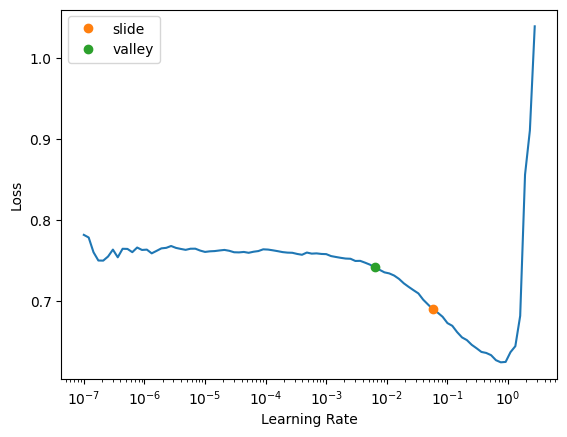

In [14]:
# To train the model, we need a learning rate. Instead of starting random, let's figure out the best learning rate.
# We can do this by using the learning rate  with suggestions.
# We can use the slide and valley method to find the best learning rate.
# slide: the learning rate where the loss is the steepest.
# valley: the learning rate where the loss is the lowest.

res = learner.lr_find(suggest_funcs=(slide, valley)) 
res

# learner.lr_find: https://docs.fast.ai/callback.schedule.html#learner.lr_find
# slide: https://docs.fast.ai/callback.schedule.html#slide
# valley: https://docs.fast.ai/callback.schedule.html#valley (default if we don't specify)
# suggested method: https://docs.fast.ai/callback.schedule.html#suggestion-methods

In [15]:
# Train a learner wtih the learning rate that is between the slide and valley.
learner.fit_one_cycle(16, lr_max=0.02)

epoch,train_loss,valid_loss,accuracy,time


Step 4: Submit to Kaggle (Get predicdtions on the test data)

First and foremost, read the test.csv file and create a dataframe for the test data.
And also make sure do the same feature engineering steps as we did for the train data.

In [16]:
# read the test.csv file
test_df = pd.read_csv(path/'test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test_df['Fare'] = test_df.Fare.fillna(0)

The above code is important as we didn't have NaN value in the training data set. 
We need to make sure the same rules are applied to the test data set. Otherwise, later on when I try to get the dataloaders for the test data, it will throw an error.
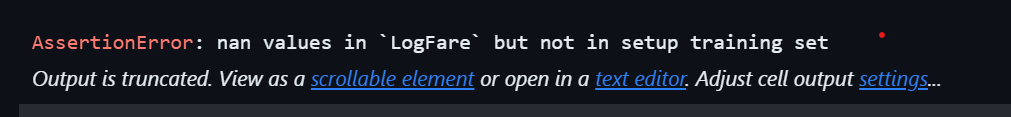

If you think about it, it makes sense. The dataloader will try to normalize the data, but if there is a NaN value, it will throw an error.

In [18]:
# add features to the test_df
add_features(test_df)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.178064,NaN,0,True,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.079442,NaN,1,False,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.369075,NaN,0,True,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.268252,NaN,0,True,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.586824,NaN,2,False,1,Mrs


Now we need to feed this data into our model. The good news is we don't need to manually specify any of the processing steps necessary to get the data ready for modeling, since that's all saved in the learner. To specify we want to apply the same steps to a new dataset, use the test_dl() method:

In [19]:
# get the dataloader for the test_df uing test_dl method.
test_dl = learner.dls.test_dl(test_df)
test_dl.vocab # class 0: died, class 1: survived

[0, 1]

In [20]:
# get the predictions for the test_df
# By default, get_preds returns a tuple of predictions and labels. Since this is a test set and we don’t have any labels
# we can ignore the second half of the tuple. (https://benjaminwarner.dev/2021/10/01/inference-with-fastai)
preds, _ = learner.get_preds(dl=test_dl)

In [22]:
# update the test_df with the predictions. We will use the second column of the predictions, which is the probability of survival.
# If the probability is greater than 0.5, we will say the person survived. Make the prediction column as integer.
test_df['Survived'] = (preds[:,1] > 0.5).numpy().astype(int)

#create a submission.csv file
test_df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

#check the submission.csv file
!head submission.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


# New concept: Ensembling.
Ensembling is a technique where you combine the predictions of multiple models to produce a better prediction than any single model.

Let's create five different models and average their predictions. This is the simplest form of ensembling.

In [25]:
# Createa a function that trains the model using the learner.
def train_model(epochs=16, lr=0.02):
    learner = tabular_learner(dls, metrics=accuracy, layers=[10,10]) # define a new learner
    learner.fit_one_cycle(epochs, lr_max=lr)
    return learner

# create a function that predicts the test_df.
def predict_test_df(learner):
    test_dl = learner.dls.test_dl(test_df)
    preds, _ = learner.get_preds(dl=test_dl)
    return preds # return the predictions

# create a fucntion that create a different learner five times, train the model and predict the test_df and comebine the predictions and return the result as the list.
def create_ensemble(n=5):
    preds = []
    for i in range(n):
        learner = train_model()
        preds.append(predict_test_df(learner))
    return preds

In [28]:
res = create_ensemble()
len(res)

epoch,train_loss,valid_loss,accuracy,time
0,0.743674,0.677770,0.623595,00:00
1,0.659825,0.608655,0.679775,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.736101,0.710410,0.404494,00:00
1,0.682701,0.616392,0.764045,00:00
2,0.611753,0.459631,0.780899,00:00
3,0.551373,0.409140,0.825843,00:00
4,0.514066,0.416656,0.837079,00:00
5,0.483101,0.402242,0.831461,00:00
6,0.459257,0.389318,0.842697,00:00
7,0.440339,0.394055,0.853933,00:00
8,0.425441,0.408491,0.831461,00:00
9,0.414088,0.394066,0.820225,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.676140,0.668974,0.612360,00:00
1,0.638729,0.622853,0.696629,00:00
2,0.582352,0.456559,0.820225,00:00
3,0.530804,0.448489,0.820225,00:00
4,0.496169,0.441198,0.814607,00:00
5,0.466940,0.432334,0.803371,00:00
6,0.448843,0.425762,0.814607,00:00
7,0.429142,0.425187,0.842697,00:00
8,0.415989,0.414066,0.825843,00:00
9,0.405062,0.407875,0.831461,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.762315,0.726537,0.404494,00:00
1,0.706749,0.632767,0.668539,00:00
2,0.628544,0.439534,0.814607,00:00
3,0.565135,0.467549,0.786517,00:00
4,0.522108,0.435156,0.808989,00:00
5,0.489004,0.415071,0.803371,00:00
6,0.463481,0.410515,0.831461,00:00
7,0.445278,0.408599,0.808989,00:00
8,0.429349,0.397252,0.831461,00:00
9,0.413519,0.396785,0.825843,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.721989,0.696564,0.606742,00:00
1,0.657024,0.604186,0.691011,00:00
2,0.579404,0.455464,0.803371,00:00
3,0.528850,0.443098,0.820225,00:00
4,0.497067,0.419399,0.831461,00:00
5,0.471688,0.402923,0.825843,00:00
6,0.443989,0.409154,0.831461,00:00
7,0.425405,0.404191,0.837079,00:00
8,0.415407,0.411288,0.808989,00:00
9,0.404491,0.411418,0.820225,00:00


5

In [39]:
# take the average of the predictions in res.
avg_preds = torch.stack(res).mean(0)
#avg_preds # uncomment this part if you would like to see the avg predictions.

I think Jeremy's way is more powerful. He created a function that contains three major steps that we need to get the predictions from the test data. Then run that function for five times. 

In [36]:
def ensemble():
    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10]) # create a new learner 
    with learn.no_bar(),learn.no_logging(): learn.fit(16, lr=0.03) #  train a learner with different random starting points. Also not showing the bar and showing the logging is a good idea.
    return learn.get_preds(dl=test_dl)[0] # do the inference with the test data, and return predictions (which wil have two columns)

In [37]:
# call ensemble function 5 times and addd the results to the list.
preds = [ensemble() for _ in range(5)]

In [38]:
preds

[tensor([[8.9517e-01, 1.0483e-01],
         [3.4638e-01, 6.5362e-01],
         [9.7575e-01, 2.4247e-02],
         [9.1298e-01, 8.7023e-02],
         [3.6426e-01, 6.3574e-01],
         [8.9901e-01, 1.0099e-01],
         [2.3266e-01, 7.6734e-01],
         [9.4966e-01, 5.0336e-02],
         [9.8341e-02, 9.0166e-01],
         [9.2263e-01, 7.7365e-02],
         [9.3941e-01, 6.0587e-02],
         [9.2264e-01, 7.7364e-02],
         [3.9583e-02, 9.6042e-01],
         [9.3961e-01, 6.0393e-02],
         [7.3017e-03, 9.9270e-01],
         [4.8302e-03, 9.9517e-01],
         [8.4455e-01, 1.5545e-01],
         [7.8022e-01, 2.1978e-01],
         [4.6094e-01, 5.3906e-01],
         [1.7101e-01, 8.2899e-01],
         [9.2431e-01, 7.5689e-02],
         [1.4972e-02, 9.8503e-01],
         [3.0766e-02, 9.6923e-01],
         [7.9498e-01, 2.0502e-01],
         [1.0609e-01, 8.9391e-01],
         [9.5787e-01, 4.2128e-02],
         [5.7937e-03, 9.9421e-01],
         [7.8838e-01, 2.1162e-01],
         [7.7609e-01